**PRESSURE TRANSIENT ANALYSIS**

---



Pressure Build Up test:
- Gives information about permeability and formation damage/Stimulation
- Gives information about static reservoir Pressure 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Oil well data of the well on which PBU test is carried out**

In [2]:
# Given Well data
tp = 310 # hrs
Qo = 4900 # STB/day
rw = 0.354 # ft
ct = 22.6 * pow(10,-6) # 1/psi
H = 482 # ft
Pwf_det0 = 2761 #psia
Uo = 0.20 # cp
porosity = 0.09
Bo = 1.55 # rbl/STB
casing_id = 0.523 # ft


**Importing PBU Well test data**

In [3]:
df = pd.read_excel('testAnalysis.xlsx')
df.head()

,delt,Pwf
0,0.00,2761
1,0.10,3057
2,0.21,3153
3,0.31,3234
4,0.52,3249


**Time vs Pwf Plot**

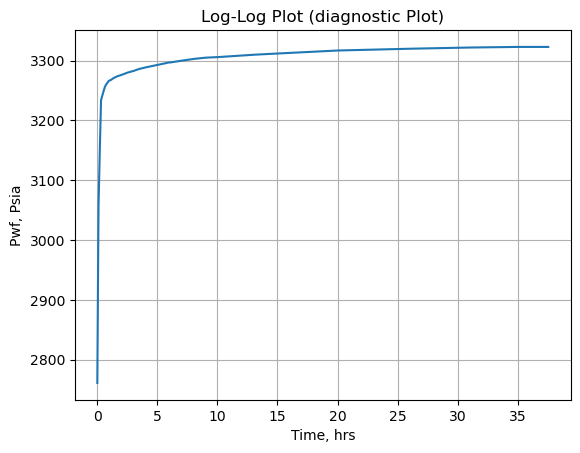

In [4]:
plt.style.use('default')
plt.plot(df['delt'], df['Pwf'])
plt.title('Log-Log Plot (diagnostic Plot)')

plt.xlabel('Time, hrs')
plt.ylabel("Pwf, Psia")

plt.grid()

**Adding column for tp+delt/delt**

In [5]:
df['tp+delt/delt'] = (tp+df['delt'])/df['delt']
df.head()

,delt,Pwf,tp+delt/delt
0,0.00,2761,inf
1,0.10,3057,3101.000000
2,0.21,3153,1477.190476
3,0.31,3234,1001.000000
4,0.52,3249,597.153846


**Semi Log PLot**

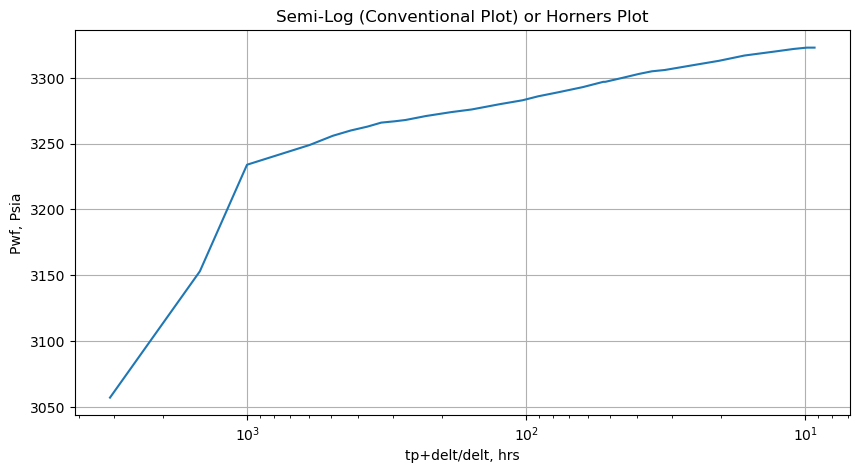

In [6]:
# Semi Log PLot of Pwf vs  tp+delt/delt
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.semilogx(df['tp+delt/delt'], df['Pwf'])
plt.gca().invert_xaxis()
plt.title('Semi-Log (Conventional Plot) or Horners Plot')

plt.xlabel('tp+delt/delt, hrs')
plt.ylabel("Pwf, Psia")

plt.grid()

**Well Bore Storage Effect**

The  Deviation at the beginning is due to the well storage effect.
During PBU test the well is closed at the surface not at the sand face. Even though the well is shut in, the reservoir fluid continues to flow
and accumulates in the wellbore until the well fills sufficiently to transmit the effect of shut-in to the formation. This “after-flow” behavior is
caused by the wellbore storage and it has a significant influence on pressure buildup data and can be observed from deviation in the semilog plot.

**Considering the Straight Line Part(not considering well bore storage effect region)**

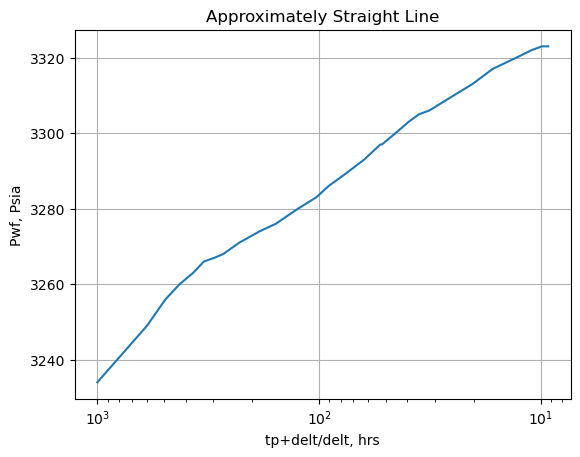

In [7]:
# Straight Line Part
df_SL = df.iloc[3:, :]

plt.style.use('default')
plt.semilogx(df_SL['tp+delt/delt'], df_SL['Pwf'],markevery= [3280])
plt.gca().invert_xaxis()
plt.title('Approximately Straight Line')

plt.xlabel('tp+delt/delt, hrs')
plt.ylabel("Pwf, Psia")

plt.grid()

**Thickness Averaged Permeability Calculation**

Equation Used:

Pwf = Pi - (162.6 * Qo * Uo * Bo)/(k * h) * log(tp + delt/delt)

On comparing with y = a + mx

- intercept, a = Pi

- slope,m = -(162.6 * Qo * Uo * Bo)/(k * h)

In [8]:
# Slope From the above straight Line
m = -(3306-3310)/(np.log10(31)-np.log10(24.68))

# Calculating Permeability
k = (162.6*Qo*Bo*Uo)/(m*H)  # in md

print("The average Permeability obtained is: {} md", (k))

The average Permeability obtained is: {} md 12.684665678184713


**Skin Calculation**

Using Superposition Principle eliminates the S term in the equation. That
means the Horner-plot slope is not affected by the skin factor; however,
the skin factor still does affect the shape of the pressure buildup data. In
fact, an early-time deviation from the straight line can be caused by skin
factor as well as by wellbore storage. 

 In any case, the skin factor does affect flowing pressure before shut-in, so skin may be estimated from the
buildup test data plus the flowing pressure immediately before the
buildup test

In [9]:
# Getting P1hr from the semilog plot
P1hr = 3266 # Psia
s = 1.151*((P1hr - Pwf_det0)/m - np.log10(k/(porosity*Uo*ct*rw*rw)) + 3.23)

print("The skin factor value obtained is {}:", (s))
print("Positive Skin factor denotes Formation damage")

The skin factor value obtained is {}: 8.442523335459487
Positive Skin factor denotes Formation damage
